<div style="background-color: #007BFF; color: #ffffff; padding: 20px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.3);">
    <h1 style="font-size: 24px; font-weight: bold; margin: 0; ">ANN Mid: Regression</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [5]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
df = pd.read_fwf('/content/auto-mpg.data', names=column_names ,index_col = False)

In [7]:
# showing the top 5 rows of data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
# Checking the data shape (rows, columns)
df.shape

(398, 8)

In [9]:
# Checking for null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

In [11]:
# coulmns data types overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [12]:
# Statistical Measures
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [14]:
# Removing the '?' from column: 'horsepower'
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(subset=['horsepower'], inplace=True)

In [15]:
# Breaking data into features and label
X = df.drop('mpg', axis = 1)
y = df['mpg']

In [16]:
# Splitting data into training, testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# Scaling dataa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Creating ANN architecture
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim= X_train_scaled.shape[1]))
model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [19]:
# Compiling the model
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['mae'])

In [20]:
# Training the model
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test), epochs = 70)

Epoch 1/70
10/10 [==============================] - 2s 30ms/step - loss: 623.2503 - mae: 23.5735 - val_loss: 570.5551 - val_mae: 22.8033
Epoch 2/70
10/10 [==============================] - 0s 6ms/step - loss: 568.3036 - mae: 22.5044 - val_loss: 552.9335 - val_mae: 22.4350
Epoch 3/70
10/10 [==============================] - 0s 8ms/step - loss: 520.3827 - mae: 21.4405 - val_loss: 531.3871 - val_mae: 21.9698
Epoch 4/70
10/10 [==============================] - 0s 5ms/step - loss: 463.0398 - mae: 20.0971 - val_loss: 503.1808 - val_mae: 21.3498
Epoch 5/70
10/10 [==============================] - 0s 7ms/step - loss: 394.3231 - mae: 18.4214 - val_loss: 464.5566 - val_mae: 20.4779
Epoch 6/70
10/10 [==============================] - 0s 8ms/step - loss: 313.5449 - mae: 16.2090 - val_loss: 411.0807 - val_mae: 19.2298
Epoch 7/70
10/10 [==============================] - 0s 6ms/step - loss: 228.0287 - mae: 13.4907 - val_loss: 342.3743 - val_mae: 17.5399
Epoch 8/70
10/10 [=============================

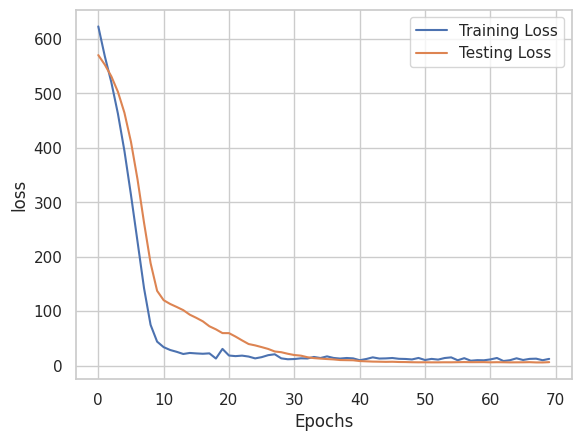

In [21]:
sns.set(style="whitegrid")
sns.lineplot(history.history['loss'], label='Training Loss')
sns.lineplot(history.history['val_loss'], label='Testing Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [22]:
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

3/3 [==============================] - 0s 5ms/step
Mean Absolute Error (MAE): 1.8181353967401048
Mean Squared Error (MSE): 6.167810713329802
R^2 Score: 0.8791586944776052
